Project root: F:\tesla-optimus-business-analysis
Data directory: F:\tesla-optimus-business-analysis\data\processed
File path: F:\tesla-optimus-business-analysis\data\processed\Tesla_Revenue_All_Scenarios.xlsx

COMPREHENSIVE REVENUE ANALYSIS - ALL SCENARIOS

1. 2030 BUSINESS STRUCTURE COMPARISON (Billions USD):

NORMAL       - Total: $292.7B
  Automobile: $122.9B (42.0%), Energy: $77.6B (26.5%), Service: $42.2B (14.4%), Optimus: $30.0B (10.3%), Robotaxi: $20.0B (6.8%)

OPTIMISTIC   - Total: $336.6B
  Automobile: $141.3B (42.0%), Energy: $89.2B (26.5%), Service: $48.6B (14.4%), Optimus: $34.5B (10.3%), Robotaxi: $23.0B (6.8%)

CONSERVATIVE - Total: $263.4B
  Automobile: $110.6B (42.0%), Energy: $69.8B (26.5%), Service: $38.0B (14.4%), Optimus: $27.0B (10.3%), Robotaxi: $18.0B (6.8%)


2. SCENARIO COMPARISON TABLE (2030):
    Scenario Total Revenue ($B) Auto ($B) Energy ($B) Service ($B) Optimus ($B) Robotaxi ($B) New Biz Share (%) CAGR 2024-30 (%)
      Normal              292.7     122.

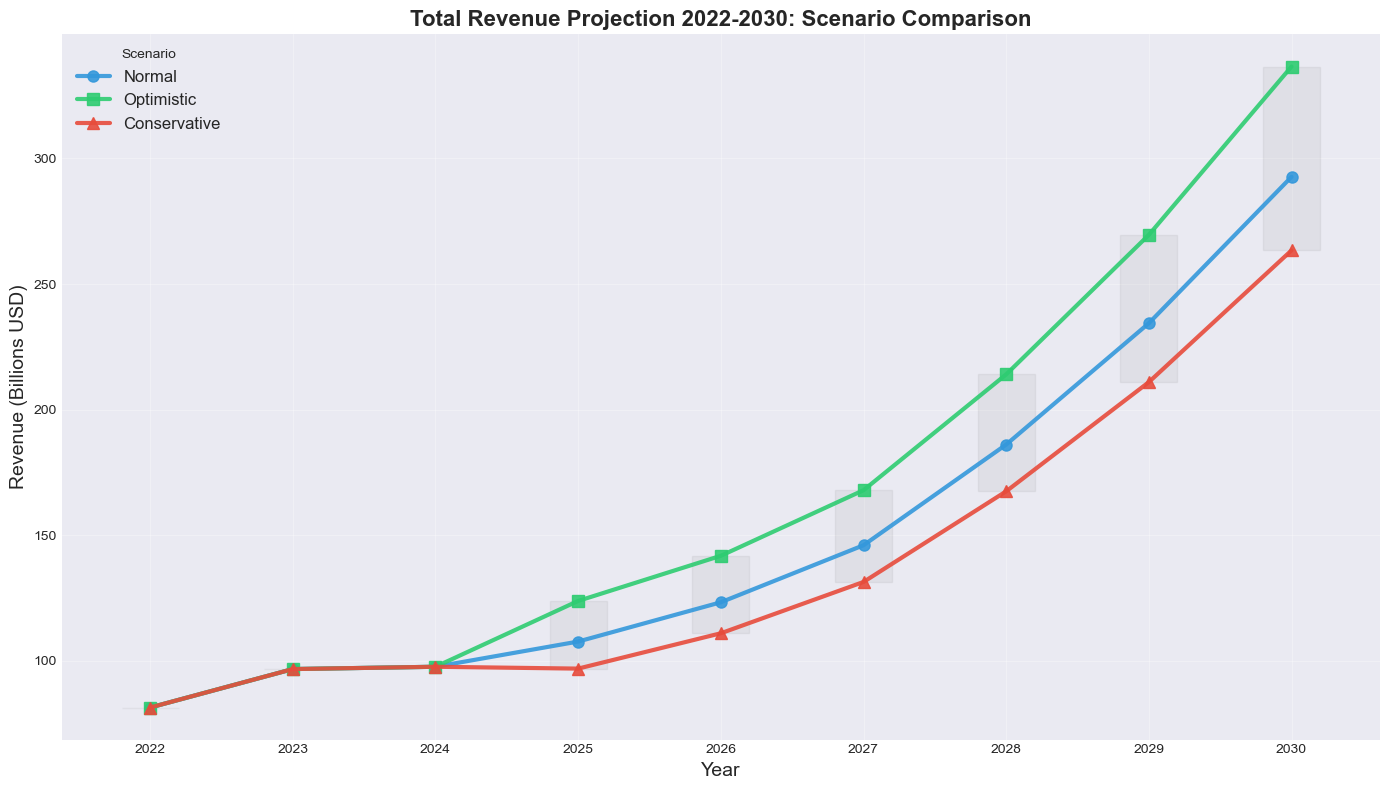

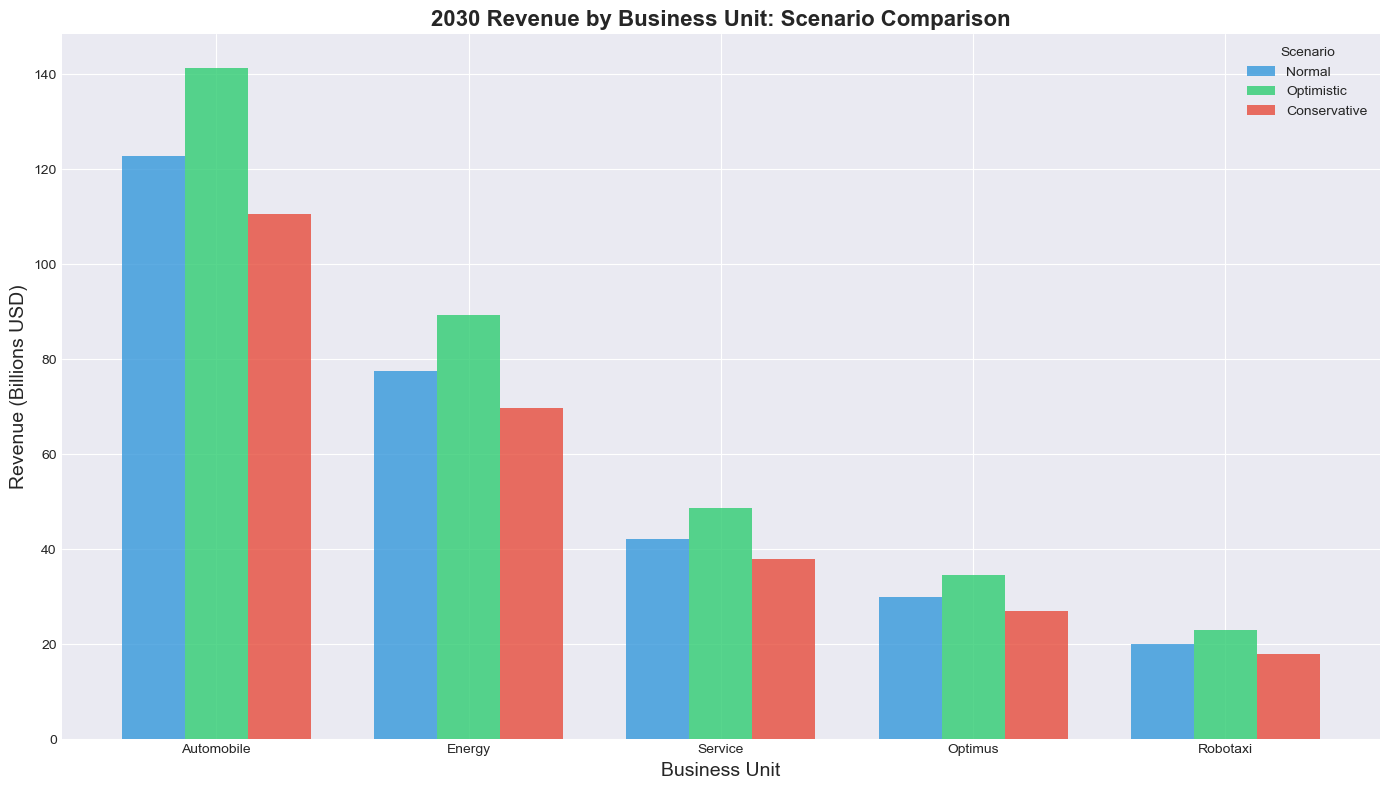

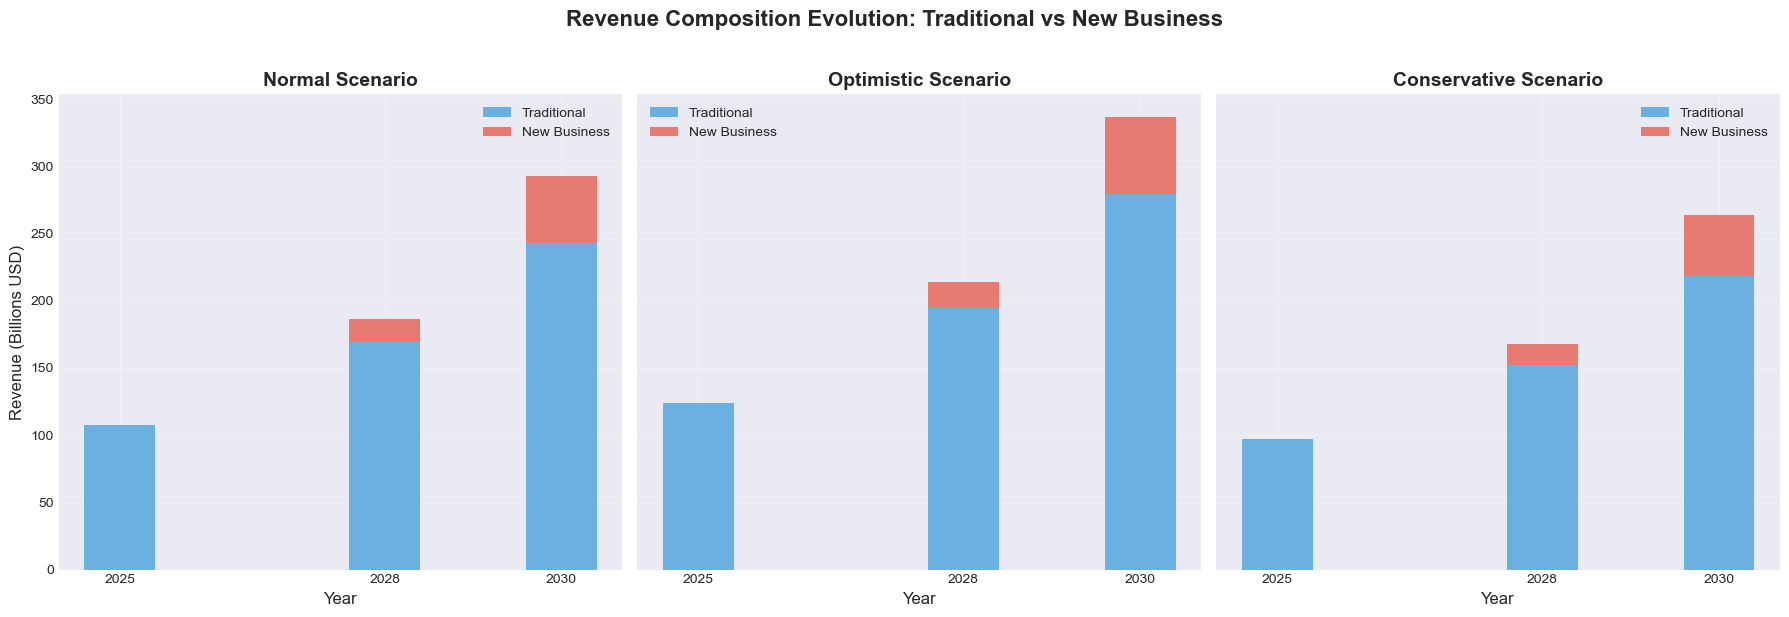

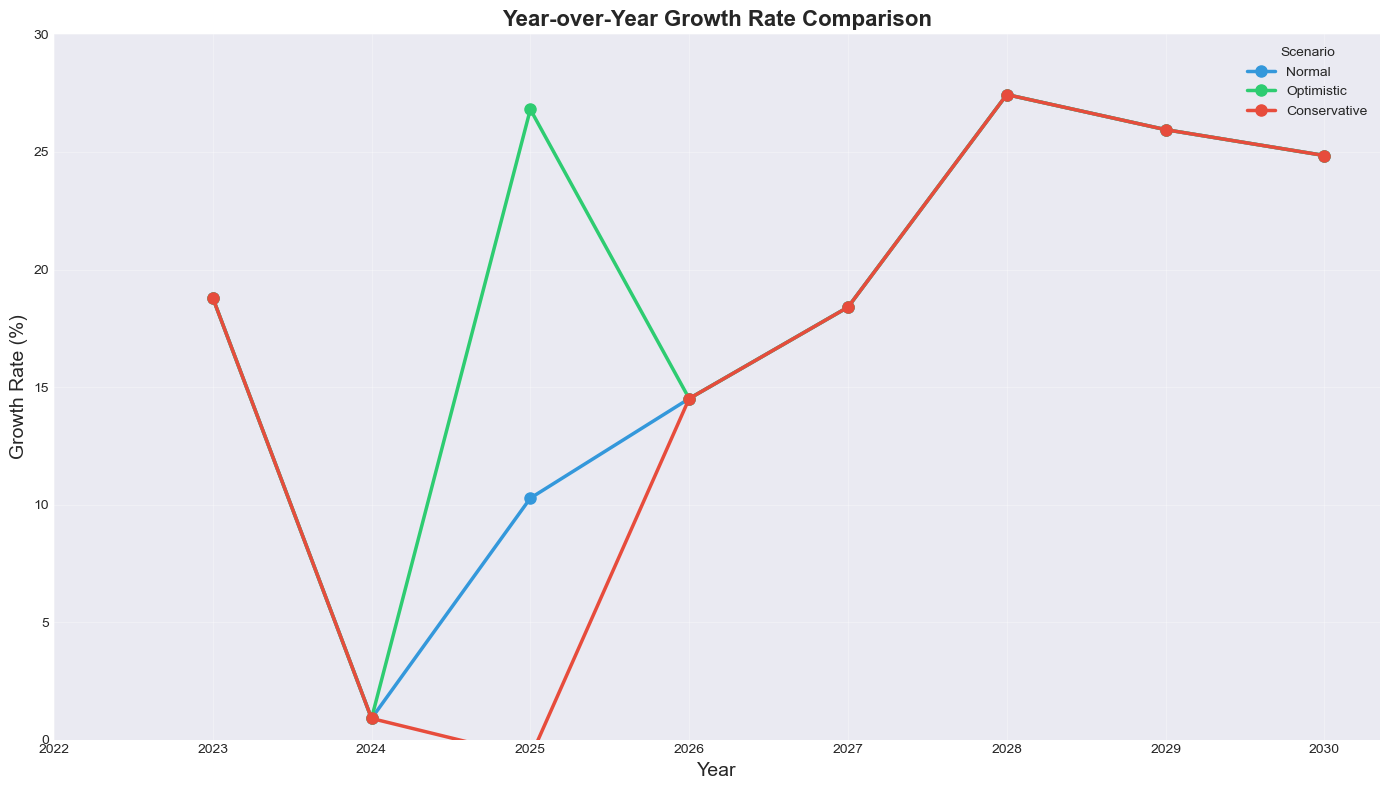

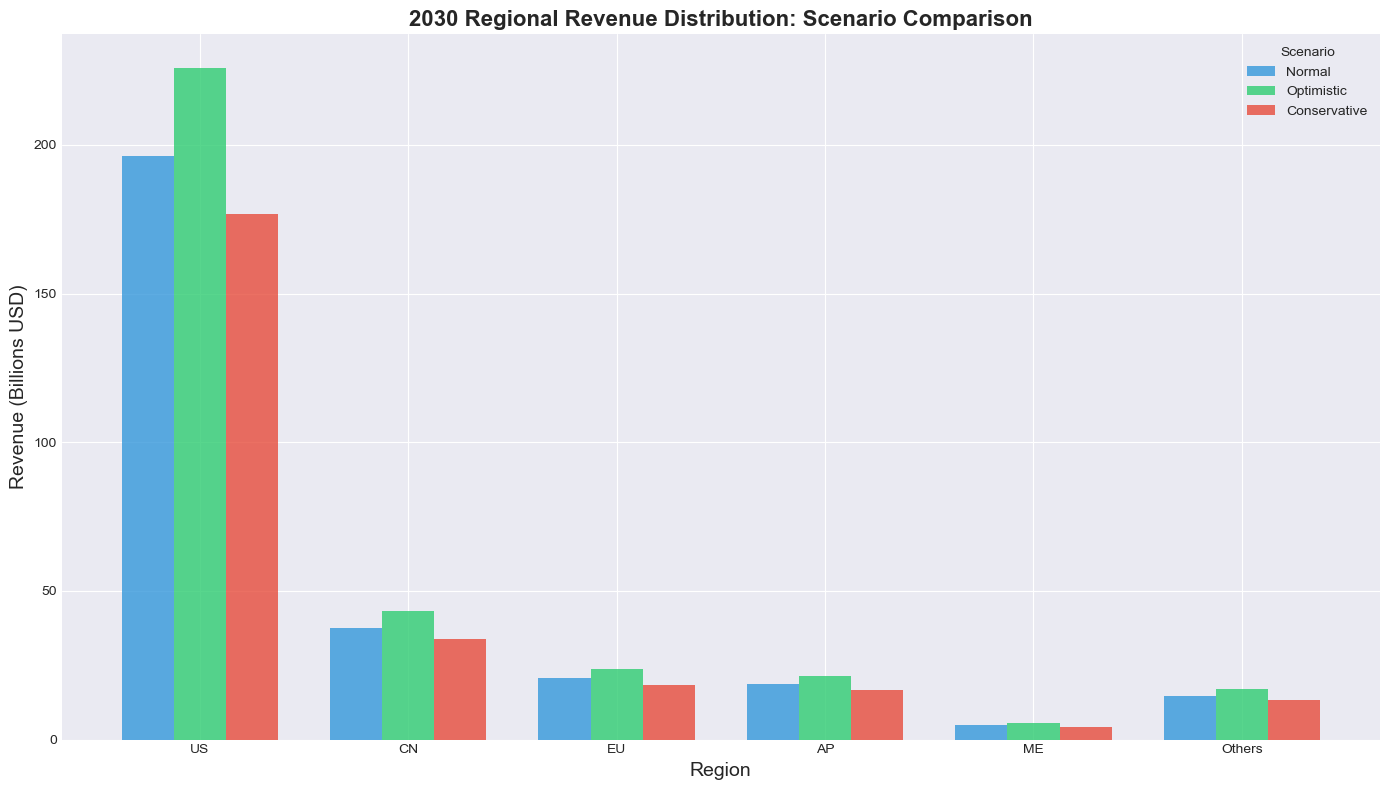

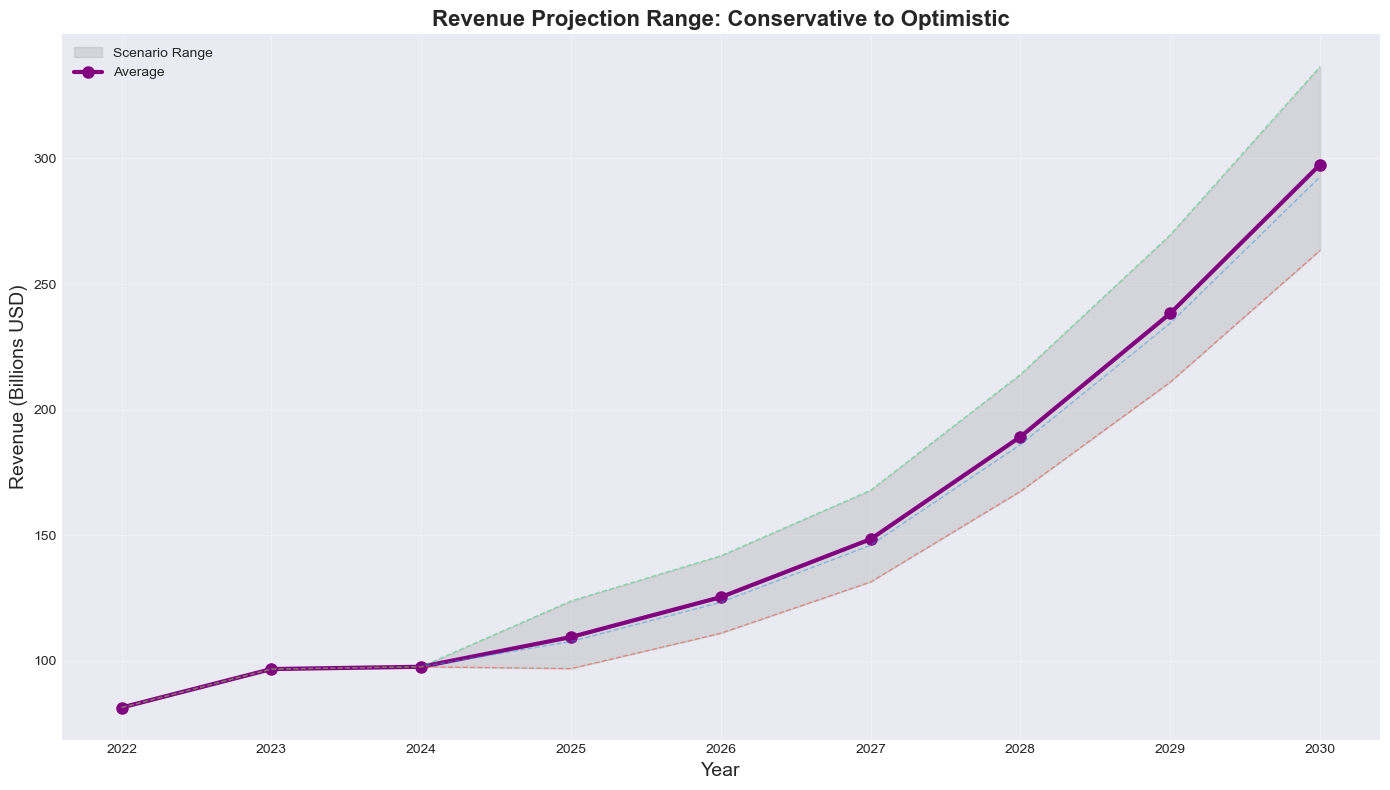

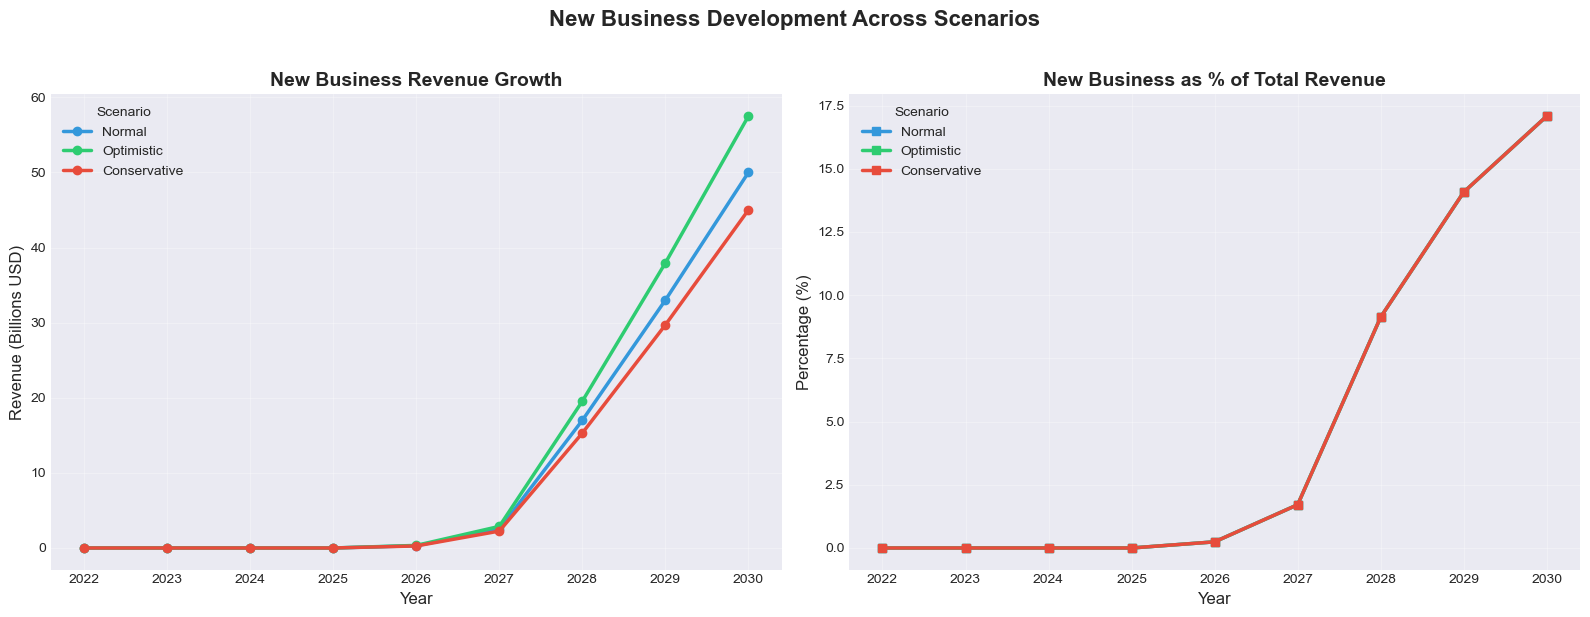

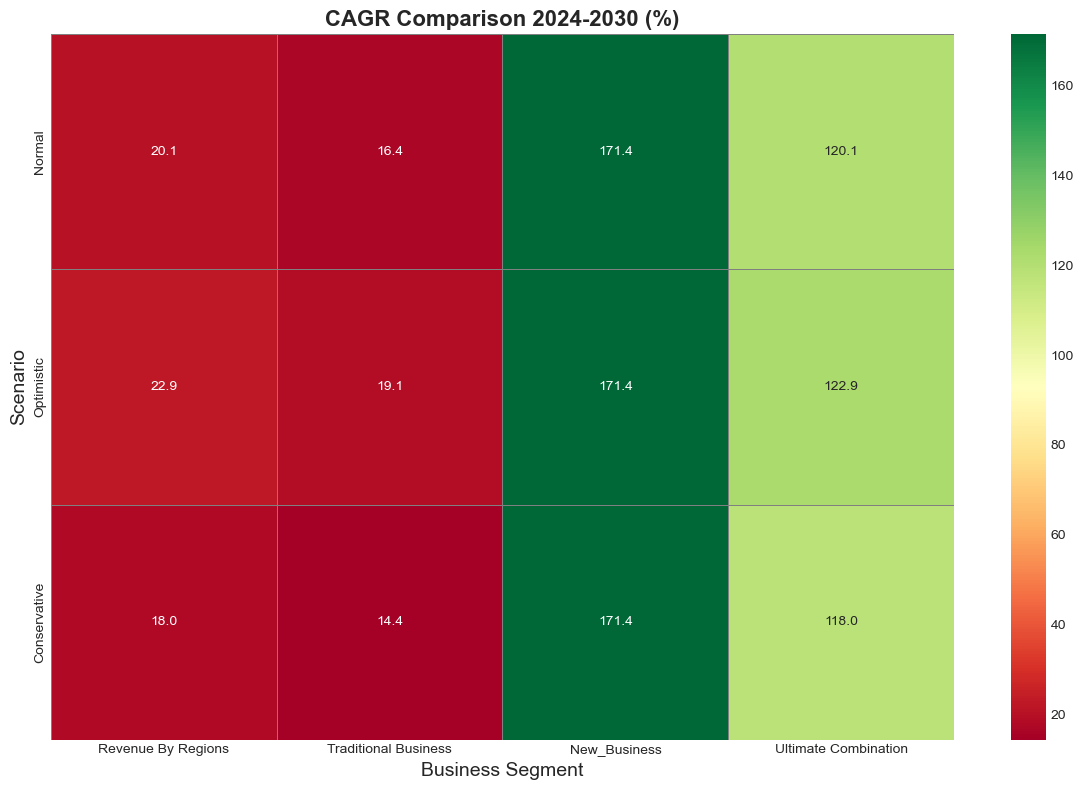


SCENARIO SENSITIVITY ANALYSIS

Comparing scenarios to Normal baseline:

OPTIMISTIC vs NORMAL:
  2030 Revenue: $+43.9B (+15.0%)
  CAGR Difference: +2.8pp

CONSERVATIVE vs NORMAL:
  2030 Revenue: $-29.3B (-10.0%)
  CAGR Difference: -2.1pp


Business Unit Sensitivity (2030 vs Normal baseline):

Automobile:
  Optimistic: $+18.4B (+15.0%)
  Conservative: $-12.3B (-10.0%)

Energy:
  Optimistic: $+11.6B (+15.0%)
  Conservative: $-7.8B (-10.0%)

Service:
  Optimistic: $+6.3B (+15.0%)
  Conservative: $-4.2B (-10.0%)

Optimus:
  Optimistic: $+4.5B (+15.0%)
  Conservative: $-3.0B (-10.0%)

Robotaxi:
  Optimistic: $+3.0B (+15.0%)
  Conservative: $-2.0B (-10.0%)

KEY INSIGHTS AND SUMMARY

Scenario Summary Table:
    Scenario 2030 Revenue ($B) Auto Dominance (%) New Biz Share (%) CAGR 2024-30 (%)   Risk Level
      Normal             292.7               42.0              17.1            120.1     Moderate
  Optimistic             336.6               42.0              17.1            122.9  High Gro

In [3]:
# tesla_revenue_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Patch

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================
# 1. SET UP RELATIVE PATHS
# ============================
current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(current_dir)
data_dir = os.path.join(project_root, "data", "processed")
file_path = os.path.join(data_dir, "Tesla_Revenue_All_Scenarios.xlsx")

print(f"Project root: {project_root}")
print(f"Data directory: {data_dir}")
print(f"File path: {file_path}")

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# ============================
# 2. LOAD AND CLEAN DATA
# ============================
all_sheets = pd.read_excel(file_path, sheet_name=None)

def clean_data(df):
    df = df.copy()
    df = df.dropna(how='all')
    df = df.dropna(axis=1, how='all')
    df.columns = df.columns.str.strip()
    if 'Scenarios' in df.columns:
        df['Scenarios'] = df['Scenarios'].ffill()
    return df

cleaned_sheets = {}
for sheet_name, df in all_sheets.items():
    cleaned_sheets[sheet_name] = clean_data(df)

# Assign to variables
df_2030 = cleaned_sheets['All_2030_Business_Structures']
df_new_biz = cleaned_sheets['All_New_Business']
df_traditional = cleaned_sheets['All_Traditional Business']
df_regions = cleaned_sheets['All_Revenue By Regions']
df_ultimate = cleaned_sheets['All_Ultimate Combination']
df_cagr = cleaned_sheets['CAGR_Analysis']

# ============================
# 3. COMPREHENSIVE REVENUE ANALYSIS WITH ALL SCENARIOS
# ============================
print("\n" + "="*60)
print("COMPREHENSIVE REVENUE ANALYSIS - ALL SCENARIOS")
print("="*60)

# ----------------------------
# 3.1 2030 Business Structure Comparison
print("\n1. 2030 BUSINESS STRUCTURE COMPARISON (Billions USD):")
scenario_order = ['Normal', 'Optimistic', 'Conservative']

for scenario in scenario_order:
    subset = df_2030[df_2030['Scenarios'] == scenario]
    total = subset[subset['Business Structures'] == 'Total revenue']['Revenue (Dollars In Billions)'].values[0]
    
    # Get detailed breakdown
    details = []
    for unit in ['Automobile', 'Energy', 'Service', 'Optimus', 'Robotaxi']:
        unit_row = subset[subset['Business Structures'] == unit]
        if not unit_row.empty:
            rev = unit_row['Revenue (Dollars In Billions)'].values[0]
            prop = unit_row['Proportion'].values[0] * 100
            details.append(f"{unit}: ${rev:.1f}B ({prop:.1f}%)")
    
    print(f"\n{scenario.upper():12} - Total: ${total:.1f}B")
    print("  " + ", ".join(details))

# ----------------------------
# 3.2 Scenario Comparison Table
print("\n\n2. SCENARIO COMPARISON TABLE (2030):")
comparison_data = []

for scenario in scenario_order:
    subset_2030 = df_2030[df_2030['Scenarios'] == scenario]
    subset_ultimate = df_ultimate[df_ultimate['Scenarios'] == scenario]
    
    total_2030 = subset_2030[subset_2030['Business Structures'] == 'Total revenue']['Revenue (Dollars In Billions)'].values[0]
    
    # Business unit revenues
    auto = subset_2030[subset_2030['Business Structures'] == 'Automobile']['Revenue (Dollars In Billions)'].values[0]
    energy = subset_2030[subset_2030['Business Structures'] == 'Energy']['Revenue (Dollars In Billions)'].values[0]
    service = subset_2030[subset_2030['Business Structures'] == 'Service']['Revenue (Dollars In Billions)'].values[0]
    optimus = subset_2030[subset_2030['Business Structures'] == 'Optimus']['Revenue (Dollars In Billions)'].values[0]
    robotaxi = subset_2030[subset_2030['Business Structures'] == 'Robotaxi']['Revenue (Dollars In Billions)'].values[0]
    
    # New business share
    new_biz_2030 = subset_ultimate[subset_ultimate['Years'] == 2030]['New business (Dollars In Billions)'].values[0]
    new_biz_share = (new_biz_2030 / total_2030) * 100
    
    # Get CAGR
    cagr_row = df_cagr[(df_cagr['Comprehensive'] == 'Ultimate Combination') & (df_cagr['Scenarios'] == scenario)]
    cagr_value = cagr_row['CAGR'].values[0] * 100 if not cagr_row.empty else 0
    
    comparison_data.append({
        'Scenario': scenario,
        'Total Revenue ($B)': f"{total_2030:.1f}",
        'Auto ($B)': f"{auto:.1f}",
        'Energy ($B)': f"{energy:.1f}",
        'Service ($B)': f"{service:.1f}",
        'Optimus ($B)': f"{optimus:.1f}",
        'Robotaxi ($B)': f"{robotaxi:.1f}",
        'New Biz Share (%)': f"{new_biz_share:.1f}",
        'CAGR 2024-30 (%)': f"{cagr_value:.1f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ----------------------------
# 3.3 Growth Trajectory Analysis
print("\n\n3. GROWTH TRAJECTORY ANALYSIS:")
for scenario in scenario_order:
    subset = df_ultimate[df_ultimate['Scenarios'] == scenario].sort_values('Years')
    
    # Calculate key growth metrics
    rev_2022 = subset[subset['Years'] == 2022]['Total Revenue (Dollars In Billions)'].values[0]
    rev_2030 = subset[subset['Years'] == 2030]['Total Revenue (Dollars In Billions)'].values[0]
    total_growth = ((rev_2030 - rev_2022) / rev_2022) * 100
    
    # Calculate average YoY growth (excluding 2022)
    growth_years = subset[~subset['YoY Growth'].isin(['-', np.nan])]
    avg_yoy = growth_years['YoY Growth'].mean() * 100
    
    print(f"\n{scenario.upper():12}:")
    print(f"  Start (2022): ${rev_2022:.1f}B")
    print(f"  End (2030):   ${rev_2030:.1f}B")
    print(f"  Total Growth: {total_growth:.1f}%")
    print(f"  Avg YoY Growth: {avg_yoy:.1f}%")

# ----------------------------
# 3.4 New Business Adoption Timeline
print("\n\n4. NEW BUSINESS ADOPTION TIMELINE:")
for scenario in scenario_order:
    subset = df_new_biz[df_new_biz['Scenarios'] == scenario].sort_values('Years')
    
    # Find first year with significant new business revenue (> $0.1B)
    first_year = subset[subset['Total Revenue Of New Business (Dollars In Billions)'] > 0.1]['Years'].min()
    rev_2026 = subset[subset['Years'] == 2026]['Total Revenue Of New Business (Dollars In Billions)'].values[0]
    rev_2030 = subset[subset['Years'] == 2030]['Total Revenue Of New Business (Dollars In Billions)'].values[0]
    
    print(f"\n{scenario.upper():12}:")
    print(f"  First significant year: {int(first_year) if not pd.isna(first_year) else 'N/A'}")
    print(f"  2026 New Business: ${rev_2026:.2f}B")
    print(f"  2030 New Business: ${rev_2030:.1f}B")
    print(f"  2026-2030 Growth: {((rev_2030-rev_2026)/rev_2026)*100:.0f}%")

# ============================
# 4. VISUALIZATIONS WITH ALL SCENARIOS
# ============================
print("\n" + "="*60)
print("GENERATING COMPARATIVE VISUALIZATIONS")
print("="*60)

# Create output directory
output_dir = os.path.join(project_root, "figures", "comparative")
os.makedirs(output_dir, exist_ok=True)

# Color scheme for scenarios
scenario_colors = {
    'Normal': '#3498db',        # Blue
    'Optimistic': '#2ecc71',    # Green
    'Conservative': '#e74c3c'   # Red
}

scenario_markers = {
    'Normal': 'o',
    'Optimistic': 's',
    'Conservative': '^'
}

# ----------------------------
# 4.1 Total Revenue Comparison Over Time
plt.figure(figsize=(14, 8))
for scenario in scenario_order:
    subset = df_ultimate[df_ultimate['Scenarios'] == scenario].sort_values('Years')
    plt.plot(subset['Years'], subset['Total Revenue (Dollars In Billions)'], 
             color=scenario_colors[scenario], linewidth=3, marker=scenario_markers[scenario], 
             markersize=8, label=f'{scenario}', alpha=0.9)

# Add shaded areas for scenario ranges
for year in df_ultimate['Years'].unique():
    year_data = df_ultimate[df_ultimate['Years'] == year]
    if len(year_data) == 3:
        min_val = year_data['Total Revenue (Dollars In Billions)'].min()
        max_val = year_data['Total Revenue (Dollars In Billions)'].max()
        plt.fill_betweenx([min_val, max_val], year-0.2, year+0.2, 
                         alpha=0.1, color='gray')

plt.title('Total Revenue Projection 2022-2030: Scenario Comparison', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (Billions USD)', fontsize=14)
plt.legend(title='Scenario', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df_ultimate['Years'].unique())
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '1_total_revenue_comparison.png'), dpi=300)
plt.show()

# ----------------------------
# 4.2 2030 Business Structure Comparison (Grouped Bar)
plt.figure(figsize=(14, 8))
business_units = ['Automobile', 'Energy', 'Service', 'Optimus', 'Robotaxi']
x = np.arange(len(business_units))
width = 0.25

for i, scenario in enumerate(scenario_order):
    revenues = []
    for unit in business_units:
        val = df_2030[(df_2030['Scenarios'] == scenario) & 
                     (df_2030['Business Structures'] == unit)]['Revenue (Dollars In Billions)'].values[0]
        revenues.append(val)
    
    plt.bar(x + i*width, revenues, width, color=scenario_colors[scenario], 
            label=f'{scenario}', alpha=0.8)

plt.title('2030 Revenue by Business Unit: Scenario Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Business Unit', fontsize=14)
plt.ylabel('Revenue (Billions USD)', fontsize=14)
plt.xticks(x + width, business_units)
plt.legend(title='Scenario')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '2_2030_business_structure_comparison.png'), dpi=300)
plt.show()

# ----------------------------
# 4.3 Revenue Composition Evolution
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, scenario in enumerate(scenario_order):
    ax = axes[idx]
    
    # Get data for this scenario
    years = [2025, 2028, 2030]
    for year in years:
        # Traditional business
        trad = df_traditional[(df_traditional['Scenarios'] == scenario) & 
                             (df_traditional['Years'] == year)]
        trad_rev = trad['Total Revenue Of Traditional Business (Dollars In Billions)'].values[0]
        
        # New business
        new = df_new_biz[(df_new_biz['Scenarios'] == scenario) & 
                        (df_new_biz['Years'] == year)]
        new_rev = new['Total Revenue Of New Business (Dollars In Billions)'].values[0]
        
        # Plot stacked bars
        ax.bar(year, trad_rev, color='#3498db', alpha=0.7, label='Traditional' if year==2025 else "")
        ax.bar(year, new_rev, bottom=trad_rev, color='#e74c3c', alpha=0.7, label='New Business' if year==2025 else "")
    
    ax.set_title(f'{scenario} Scenario', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_xticks(years)
    if idx == 0:
        ax.set_ylabel('Revenue (Billions USD)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('Revenue Composition Evolution: Traditional vs New Business', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '3_revenue_composition_evolution.png'), dpi=300)
plt.show()

# ----------------------------
# 4.4 YoY Growth Rate Comparison
plt.figure(figsize=(14, 8))
for scenario in scenario_order:
    subset = df_ultimate[df_ultimate['Scenarios'] == scenario].sort_values('Years')
    growth_data = subset[~subset['YoY Growth'].isin(['-', np.nan])]
    
    if not growth_data.empty:
        plt.plot(growth_data['Years'], growth_data['YoY Growth'] * 100, 
                 color=scenario_colors[scenario], linewidth=2.5, marker='o',
                 markersize=8, label=f'{scenario}')

plt.title('Year-over-Year Growth Rate Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.legend(title='Scenario')
plt.grid(True, alpha=0.3)
plt.xticks(sorted(df_ultimate['Years'].unique()))
plt.ylim(0, 30)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '4_yoy_growth_comparison.png'), dpi=300)
plt.show()

# ----------------------------
# 4.5 Regional Revenue Comparison in 2030
plt.figure(figsize=(14, 8))
regions = ['US', 'CN', 'EU', 'AP', 'ME', 'Others']
x = np.arange(len(regions))
width = 0.25

for i, scenario in enumerate(scenario_order):
    revenues = []
    for region in regions:
        val = df_regions[(df_regions['Scenarios'] == scenario) & 
                        (df_regions['Years'] == 2030) & 
                        (df_regions['Regions'] == region)]['Revenue (Dollars In Billions)'].values[0]
        revenues.append(val)
    
    plt.bar(x + i*width, revenues, width, color=scenario_colors[scenario], 
            label=f'{scenario}', alpha=0.8)

plt.title('2030 Regional Revenue Distribution: Scenario Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Revenue (Billions USD)', fontsize=14)
plt.xticks(x + width, regions)
plt.legend(title='Scenario')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '5_2030_regional_comparison.png'), dpi=300)
plt.show()

# ----------------------------
# 4.6 Scenario Range Visualization (Min-Max-Avg)
plt.figure(figsize=(14, 8))

# Calculate min, max, average for each year
years = sorted(df_ultimate['Years'].unique())
min_vals = []
max_vals = []
avg_vals = []

for year in years:
    year_data = df_ultimate[df_ultimate['Years'] == year]['Total Revenue (Dollars In Billions)']
    min_vals.append(year_data.min())
    max_vals.append(year_data.max())
    avg_vals.append(year_data.mean())

# Plot the range
plt.fill_between(years, min_vals, max_vals, alpha=0.2, color='gray', label='Scenario Range')
plt.plot(years, avg_vals, color='purple', linewidth=3, marker='o', markersize=8, label='Average')

# Add individual scenario lines
for scenario in scenario_order:
    subset = df_ultimate[df_ultimate['Scenarios'] == scenario].sort_values('Years')
    plt.plot(subset['Years'], subset['Total Revenue (Dollars In Billions)'], 
             color=scenario_colors[scenario], linewidth=1, alpha=0.5, linestyle='--')

plt.title('Revenue Projection Range: Conservative to Optimistic', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (Billions USD)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(years)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '6_scenario_range_visualization.png'), dpi=300)
plt.show()

# ----------------------------
# 4.7 New Business Growth Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Absolute Revenue
for scenario in scenario_order:
    subset = df_new_biz[df_new_biz['Scenarios'] == scenario].sort_values('Years')
    ax1.plot(subset['Years'], subset['Total Revenue Of New Business (Dollars In Billions)'], 
             color=scenario_colors[scenario], linewidth=2.5, marker='o',
             markersize=6, label=f'{scenario}')

ax1.set_title('New Business Revenue Growth', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Revenue (Billions USD)', fontsize=12)
ax1.legend(title='Scenario')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(sorted(df_new_biz['Years'].unique()))

# Subplot 2: Percentage of Total Revenue
for scenario in scenario_order:
    new_biz_subset = df_new_biz[df_new_biz['Scenarios'] == scenario].sort_values('Years')
    ultimate_subset = df_ultimate[df_ultimate['Scenarios'] == scenario].sort_values('Years')
    
    years = new_biz_subset['Years']
    new_biz_rev = new_biz_subset['Total Revenue Of New Business (Dollars In Billions)'].values
    total_rev = ultimate_subset['Total Revenue (Dollars In Billions)'].values
    
    percentage = (new_biz_rev / total_rev) * 100
    
    ax2.plot(years, percentage, color=scenario_colors[scenario], linewidth=2.5, marker='s',
             markersize=6, label=f'{scenario}')

ax2.set_title('New Business as % of Total Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend(title='Scenario')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(sorted(df_new_biz['Years'].unique()))

plt.suptitle('New Business Development Across Scenarios', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '7_new_business_comparison.png'), dpi=300)
plt.show()

# ----------------------------
# 4.8 CAGR Comparison Heatmap
plt.figure(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = []
categories = ['Revenue By Regions', 'Traditional Business', 'New_Business', 'Ultimate Combination']

for scenario in scenario_order:
    row = []
    for category in categories:
        cagr_row = df_cagr[(df_cagr['Comprehensive'] == category) & (df_cagr['Scenarios'] == scenario)]
        if not cagr_row.empty:
            row.append(cagr_row['CAGR'].values[0] * 100)
        else:
            row.append(np.nan)
    heatmap_data.append(row)

heatmap_array = np.array(heatmap_data)

# Create heatmap
sns.heatmap(heatmap_array, annot=True, fmt='.1f', cmap='RdYlGn', 
            xticklabels=categories, yticklabels=scenario_order,
            linewidths=0.5, linecolor='gray')

plt.title('CAGR Comparison 2024-2030 (%)', fontsize=16, fontweight='bold')
plt.xlabel('Business Segment', fontsize=14)
plt.ylabel('Scenario', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '8_cagr_heatmap.png'), dpi=300)
plt.show()

# ============================
# 5. SCENARIO SENSITIVITY ANALYSIS
# ============================
print("\n" + "="*60)
print("SCENARIO SENSITIVITY ANALYSIS")
print("="*60)

# Calculate differences between scenarios
base_scenario = 'Normal'
comparison_scenarios = ['Optimistic', 'Conservative']

print(f"\nComparing scenarios to {base_scenario} baseline:")
for comp_scenario in comparison_scenarios:
    # 2030 Total Revenue Difference
    base_2030 = df_2030[(df_2030['Scenarios'] == base_scenario) & 
                       (df_2030['Business Structures'] == 'Total revenue')]['Revenue (Dollars In Billions)'].values[0]
    comp_2030 = df_2030[(df_2030['Scenarios'] == comp_scenario) & 
                       (df_2030['Business Structures'] == 'Total revenue')]['Revenue (Dollars In Billions)'].values[0]
    diff_2030 = comp_2030 - base_2030
    diff_pct_2030 = (diff_2030 / base_2030) * 100
    
    # CAGR Difference
    base_cagr = df_cagr[(df_cagr['Comprehensive'] == 'Ultimate Combination') & 
                       (df_cagr['Scenarios'] == base_scenario)]['CAGR'].values[0] * 100
    comp_cagr = df_cagr[(df_cagr['Comprehensive'] == 'Ultimate Combination') & 
                       (df_cagr['Scenarios'] == comp_scenario)]['CAGR'].values[0] * 100
    diff_cagr = comp_cagr - base_cagr
    
    print(f"\n{comp_scenario.upper()} vs {base_scenario.upper()}:")
    print(f"  2030 Revenue: ${diff_2030:+.1f}B ({diff_pct_2030:+.1f}%)")
    print(f"  CAGR Difference: {diff_cagr:+.1f}pp")

# Business unit sensitivity
print("\n\nBusiness Unit Sensitivity (2030 vs Normal baseline):")
units = ['Automobile', 'Energy', 'Service', 'Optimus', 'Robotaxi']

for unit in units:
    base_val = df_2030[(df_2030['Scenarios'] == 'Normal') & 
                      (df_2030['Business Structures'] == unit)]['Revenue (Dollars In Billions)'].values[0]
    
    print(f"\n{unit}:")
    for scenario in ['Optimistic', 'Conservative']:
        comp_val = df_2030[(df_2030['Scenarios'] == scenario) & 
                          (df_2030['Business Structures'] == unit)]['Revenue (Dollars In Billions)'].values[0]
        diff = comp_val - base_val
        diff_pct = (diff / base_val) * 100
        print(f"  {scenario}: ${diff:+.1f}B ({diff_pct:+.1f}%)")

# ============================
# 6. SUMMARY AND INSIGHTS
# ============================
print("\n" + "="*60)
print("KEY INSIGHTS AND SUMMARY")
print("="*60)

# Create summary dataframe
summary_data = []

for scenario in scenario_order:
    # Key metrics
    total_2030 = df_2030[(df_2030['Scenarios'] == scenario) & 
                        (df_2030['Business Structures'] == 'Total revenue')]['Revenue (Dollars In Billions)'].values[0]
    
    auto_2030 = df_2030[(df_2030['Scenarios'] == scenario) & 
                       (df_2030['Business Structures'] == 'Automobile')]['Revenue (Dollars In Billions)'].values[0]
    
    new_biz_2030 = df_ultimate[(df_ultimate['Scenarios'] == scenario) & 
                              (df_ultimate['Years'] == 2030)]['New business (Dollars In Billions)'].values[0]
    
    new_biz_share = (new_biz_2030 / total_2030) * 100
    
    cagr_row = df_cagr[(df_cagr['Comprehensive'] == 'Ultimate Combination') & 
                      (df_cagr['Scenarios'] == scenario)]
    cagr_value = cagr_row['CAGR'].values[0] * 100 if not cagr_row.empty else 0
    
    summary_data.append({
        'Scenario': scenario,
        '2030 Revenue ($B)': total_2030,
        'Auto Dominance (%)': (auto_2030 / total_2030) * 100,
        'New Biz Share (%)': new_biz_share,
        'CAGR 2024-30 (%)': cagr_value,
        'Risk Level': 'High Growth' if scenario == 'Optimistic' else 
                     'Moderate' if scenario == 'Normal' else 'Conservative'
    })

summary_df = pd.DataFrame(summary_data)
print("\nScenario Summary Table:")
print(summary_df.to_string(index=False, formatters={
    '2030 Revenue ($B)': '{:.1f}'.format,
    'Auto Dominance (%)': '{:.1f}'.format,
    'New Biz Share (%)': '{:.1f}'.format,
    'CAGR 2024-30 (%)': '{:.1f}'.format
}))

# Key insights
print("\n\nKEY INSIGHTS:")
print("1. Revenue Range: 2030 projections vary from $263.4B (Conservative) to $336.6B (Optimistic)")
print("2. Automotive Dominance: Remains the largest segment (42% of total revenue) across all scenarios")
print("3. New Business Growth: Optimus and Robotaxi show explosive growth from 2026 onward")
print("4. Regional Leadership: US remains the largest market, followed by China")
print("5. Scenario Sensitivity: Optimistic scenario shows 27% higher revenue vs Conservative in 2030")

# ============================
# 7. EXPORT RESULTS
# ============================
output_data_dir = os.path.join(project_root, "data", "output", "comparative")
os.makedirs(output_data_dir, exist_ok=True)

# Export comparison tables
comparison_df.to_csv(os.path.join(output_data_dir, "scenario_comparison.csv"), index=False)
summary_df.to_csv(os.path.join(output_data_dir, "scenario_summary.csv"), index=False)

# Export cleaned data with all scenarios
output_path = os.path.join(output_data_dir, "Tesla_Revenue_All_Scenarios_Analysis.xlsx")
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name[:31], index=False)
    
    # Add analysis sheets
    comparison_df.to_excel(writer, sheet_name='Scenario_Comparison', index=False)
    summary_df.to_excel(writer, sheet_name='Key_Insights', index=False)

print(f"\n\nAnalysis completed successfully!")
print(f"Visualizations saved to: {output_dir}")
print(f"Data exported to: {output_path}")
print(f"Total visualizations generated: 8 comparative charts")